In [8]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [9]:
#np.random.seed(seed=32)

In [10]:
class TukeyRegression():
    def __init__(self,phis,eta,eps=0.01,theta_init=[0,0],randomize=False):
        self.phis = phis
        self.eta = eta
        self.theta = theta_init
        self.n = len(phis)
        self.eps = eps
        if randomize:
            self.theta = np.random.randn(len(theta_init))
        self.theta_init = self.theta
        
    def fit(self,x,y,log=True):
        self.m = len(x)
        self.x = x
        self.y = y
        count = 0
        while(True):
            count += 1
            theta_next = self.__next_step()
            loss = self.__get_loss()
            if log:
                if count%20==0:
                    print('#{0} iterations.  loss={1:.03f}'.format(count,loss))
                    #print(self.w_tilde)
            if loss < self.eps:
                break
            if count > 200:
                print('Did not converge.')
                break
            self.theta = theta_next
                
    def predict(self):
        return self.__f(self.x)
    
    def __get_loss(self):
        loss = 0
        for i in range(self.m):
            r = self.__f(self.x[i])-self.y[i]
            loss += self.__rho_tukey(r)
        return loss
    
    def __next_step(self):
        Phi = self.__get_Phi()
        W_tilde = self.__get_W_tilde()
        return np.linalg.inv(Phi.T@W_tilde@Phi)@Phi.T@W_tilde@self.y
    
    def __get_Phi(self):
        return np.array([[phis[j](x[i]) for i in range(self.m)] for j in range(self.n)]).T       
        
    def __f(self,x):
        if type(x)==np.ndarray:
            x = x.tolist()
        if type(x)==list:
            m = len(x)
            ans = [sum([self.phis[j](x[i])*self.theta[j] for j in range(self.n)]) for i in range(self.m)]
        elif type(x)==int:
            ans = sum([self.phis[j](x)*self.theta[j] for j in range(self.n)])
        return ans
    
    def __get_r_tilde(self):
        return [self.__f(self.x)[i] - self.y[i] for i in range(self.m)] 
    
    def __get_W_tilde(self):
        r_tilde = self.__get_r_tilde()
        self.w_tilde = [self.__d_rho_tukey(r)/r for r in r_tilde]
        return np.diag(self.w_tilde)
    
    def __rho_tukey(self,r):
        if abs(r)<self.eta:
            return (1-(1-r**2/self.eta**2)**3)/6
        else:
            return 1/6    
        
    def __d_rho_tukey(self,r):
        if abs(r)<self.eta:
            return (1-r**2/self.eta**2)**2/self.eta**2
        else:
            return 0

In [11]:
phis = [lambda x:1, lambda x:x]

In [12]:
x = [0,1,2,3,4,5,6,7,8,9]
y = [2.1,4.0,5.9,7.9,10.0,16.2,14.1,15.9,18.1,20.1]

In [15]:
tr = TukeyRegression(phis,eta=10,randomize=True)
tr.fit(x,y)

#20 iterations.  loss=0.073
#40 iterations.  loss=0.073
#60 iterations.  loss=0.074
#80 iterations.  loss=0.072
#100 iterations.  loss=0.072
#120 iterations.  loss=0.073
#140 iterations.  loss=0.071
#160 iterations.  loss=0.074
#180 iterations.  loss=0.073
#200 iterations.  loss=0.073
Did not converge.


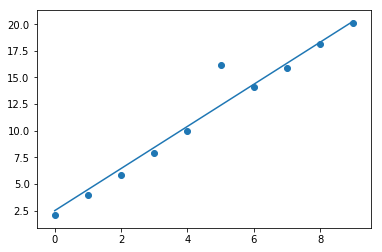

In [16]:
plt.plot(tr.predict())
plt.scatter(x,y)

In [67]:
tr.theta_init

array([ 1.77436028, -0.98274957])